# Intelligence & Availability for Adoption of Dog Breeds

I am comparing the intelligence of different dog breeds with the number of listings for adoption of each breed in 2019. I was inspired to research this potential relationship because I felt that I might be able to identify trends in which dogs are put up for adoption most frequently. I felt that the results of this research might have real-world applications for shelters and those facilitating dog adoption.

I hypothesize that there will be an inverse relationship between how intelligent a dog breed is and how many of that breed are listed for adoption on Petfinder. This hypothesis is based on the logic that the dog breeds that are the easiest to train are also the easiest to care for and are put up for adoption less frequently. However, I have no real basis for my hypothesis besides this logic, and I am approaching this project with an open-minded curiosity.

In [2]:
import pandas as pd
import random
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Here I import the breed intelligence file

In [3]:
dog_int=pd.read_csv('../data/dog_intelligence.csv')
dog_int["Breed"]=dog_int["Breed"].str.lower()
unique_int_breeds=dog_int["Breed"].unique()

Here I import the Petfinder file

In [4]:
petfinder_data=pd.read_csv('../data/dog_PetFinder_descriptions.csv')
only_breedknown_filter=petfinder_data["breed_unknown"] == False
petfinder_data_cleaned=petfinder_data[only_breedknown_filter]
petfinder_data_cleaned["breed_primary"] = petfinder_data_cleaned["breed_primary"].str.lower()
unique_petfinder_breeds=petfinder_data_cleaned["breed_primary"].unique()

This next markdown cell determines which breeds the intelligence data and the Petfinder primary breed data both include.

In [5]:
breeds_in_common=set(unique_int_breeds) & set(unique_petfinder_breeds)
int_in_common_filter=dog_int["Breed"].isin(breeds_in_common)
dog_int_filtered=dog_int[int_in_common_filter]

Next, I make a new dataset with only the breeds that the Petfinder primary breed data and the intelligence data have in common.

In [6]:
petfinder_in_common_filter=petfinder_data_cleaned["breed_primary"].isin(breeds_in_common)
pf_data_filtered=petfinder_data_cleaned[petfinder_in_common_filter]

The next markdown cell shows how many dogs in the filtered data have a secondary breed listed in the Petfinder data. This is helpful to understand because I will be using only the listings with both primary and secondary breed listings when exploring secondary breed listings.

In [7]:
petfinder_in_common_filter=petfinder_data_cleaned["breed_primary"].isin(breeds_in_common)
pf_data_filtered=petfinder_data_cleaned[petfinder_in_common_filter]
dog_int_dict=dog_int_filtered.set_index("Breed").to_dict()["Classification"]
pf_data_filtered["primary_int_class"]=pf_data_filtered["breed_primary"].map(dog_int_dict)


/tmp/ipykernel_1797365/1080604390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_data_filtered["primary_int_class"]=pf_data_filtered["breed_primary"].map(dog_int_dict)


The following graph shows how many of each breed are in each intelligence classification based on primary breed listing in the Petfinder data. This graph resembles a bell curve with the most and least intelligent classifications enveloping the fewest breeds.

<Axes: title={'center': 'Number of Breeds Per Intelligence Classification'}, xlabel='Intelligence Class', ylabel='Number of Breeds'>

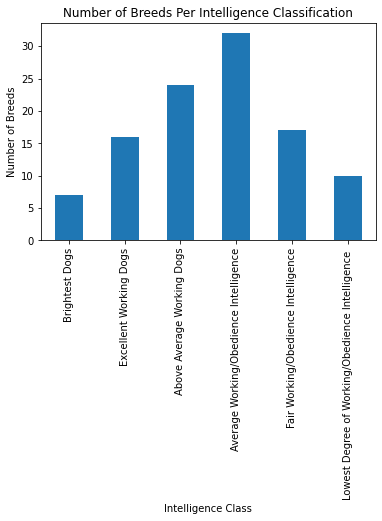

In [8]:
int_order=["Brightest Dogs", "Excellent Working Dogs", "Above Average Working Dogs", "Average Working/Obedience Intelligence", "Fair Working/Obedience Intelligence", "Lowest Degree of Working/Obedience Intelligence "]
breeds_by_int=dog_int_filtered.groupby("Classification")["Breed"].count().loc[int_order]
breeds_by_int
breeds_by_int.plot(kind='bar',title="Number of Breeds Per Intelligence Classification", ylabel="Number of Breeds", xlabel="Intelligence Class")

This graph shows the vast distribution of dogs listed for adoption based on their intelligence classification. While there are very few dog breeds classified as "Brightest Dogs", this classification contains the overwhelming majority of listings. Also, this finding directly contradicts with my hypothesis that more intelligent breeds would be less likely to be put up for adoption than less intelligent breeds. This revelation led me to explore which breeds were most commonly put up for adoption.

<Axes: title={'center': 'Number of Adoptable Dogs by Intelligence'}, xlabel='Intelligence Class', ylabel='Number of Dogs'>

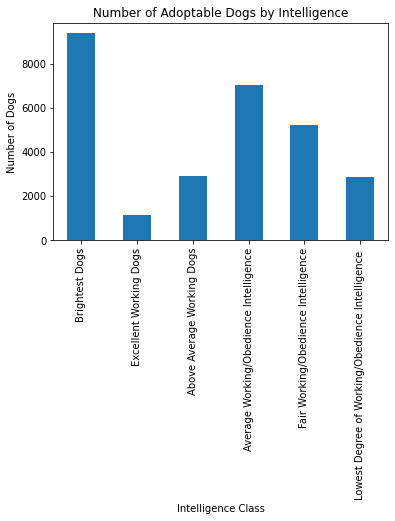

In [9]:
count_by_int=pf_data_filtered.groupby("primary_int_class")["primary_int_class"].count().loc[int_order]
count_by_int.plot(kind='bar',title="Number of Adoptable Dogs by Intelligence", ylabel="Number of Dogs", xlabel="Intelligence Class")

As I figured, there were some extreme outliers for which breeds were most commonly put up for adoption in my data. After I made this realization, I knew that I had to figure out which intelligence classification labrador retrievers and chihuahuas were a part of.

<Axes: title={'center': 'Number of Adoptable Dogs by Breed (top 10)'}, xlabel='Breed', ylabel='Number of Dogs'>

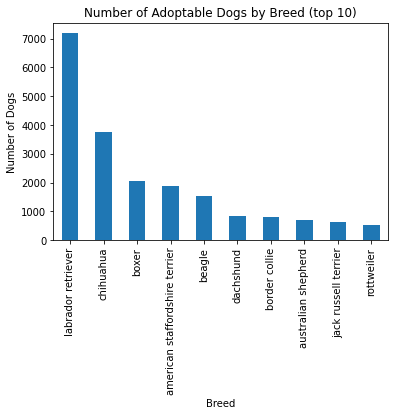

In [10]:
count_by_breed=pf_data_filtered.groupby("breed_primary")["breed_primary"].count().sort_values(ascending=False)
count_by_breed.head(10).plot(kind='bar',title="Number of Adoptable Dogs by Breed (top 10)", ylabel="Number of Dogs", xlabel="Breed")

While it made perfect sense that labrador retrievers were classified as "Brightest Dogs", bolstering the representation of this classification in the data, I found it curious that chihuahuas were not a part of either of the top 2 most represented classifications. 

In [11]:
dog_int.loc[dog_int["Breed"]=="labrador retriever"]

,Breed,Classification,obey,reps_lower,reps_upper
6,labrador retriever,Brightest Dogs,95%,1,4


In [12]:
dog_int.loc[dog_int["Breed"]=="chihuahua"]

,Breed,Classification,obey,reps_lower,reps_upper
122,chihuahua,Fair Working/Obedience Intelligence,30%,41,80


These findings made me curious as to how many of these dogs had a second breed.

<Axes: title={'center': 'Number of Dogs With a Second Breed Listed'}, xlabel='Number of Dogs', ylabel='Category'>

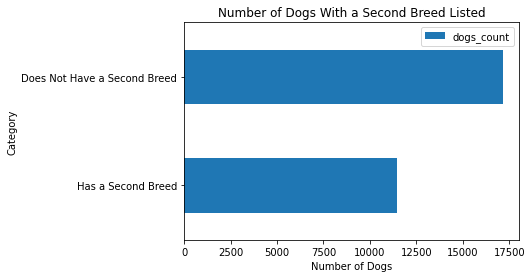

In [20]:
nan_second_breed=pf_data_filtered["breed_secondary"].isna().sum()
non_nan_second_breed=pf_data_filtered["breed_secondary"].count()
second_breed_data=[['Has a Second Breed', non_nan_second_breed],["Does Not Have a Second Breed", nan_second_breed]]
second_breed_df=pd.DataFrame(second_breed_data, columns=["category","dogs_count"])
second_breed_df=second_breed_df.set_index("category")
second_breed_df.plot(kind='barh', title="Number of Dogs With a Second Breed Listed", ylabel="Category", xlabel="Number of Dogs")

While this data showed that most dogs did not have a second breed, I wanted to isolate those that did in order to determine if the same patterns that existed for primary breed listing in the Petfinder dataset also existed for the secondary breed listing. I make a filter for rows that do not have an input for secondary breed. Then I make a new dataframe out of these rows.


In [21]:
not_second_breed_filter=pf_data_filtered["breed_secondary"].isna() 
only_second_breed_df = pf_data_filtered[-not_second_breed_filter]
only_second_breed_df["breed_secondary"]=only_second_breed_df["breed_secondary"].str.lower()
unique_secondary_breeds=only_second_breed_df["breed_secondary"].unique()
secondary_breeds_in_common=set(unique_int_breeds) & set(unique_secondary_breeds)
secondary_int_in_common_filter=dog_int["Breed"].isin(secondary_breeds_in_common)
dog_int_filtered_secondary=dog_int[secondary_int_in_common_filter]

/tmp/ipykernel_1797365/3821556536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_second_breed_df["breed_secondary"]=only_second_breed_df["breed_secondary"].str.lower()


In the code cell below, I look at the distribution of dog breeds in each of the classifications of intelligence for the dogs' secondary breed in the same way that I did for the dogs' primary breed. Although there are slightly fewer total breeds for the secondary breeds, the shape of the bar graph appears to be the same when compared to that of the primary breeds.

<Axes: title={'center': 'Number of Breeds Per Intelligence Classification'}, xlabel='Intelligence Class', ylabel='Number of Breeds'>

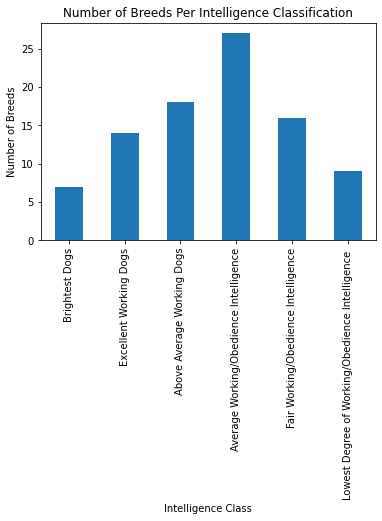

In [22]:
breeds_by_int_secondary=dog_int_filtered_secondary.groupby("Classification")["Breed"].count().loc[int_order]
breeds_by_int_secondary.plot(kind='bar',title="Number of Breeds Per Intelligence Classification", ylabel="Number of Breeds", xlabel="Intelligence Class")

Next I isolate rows that only have breeds in common with the intelligence dataset so that I can successfully add a new column for secondary breed intelligence.

In [23]:
petfinder_in_common_filter_secondary=only_second_breed_df["breed_secondary"].isin(secondary_breeds_in_common)
pf_data_filtered_secondary=only_second_breed_df[petfinder_in_common_filter_secondary]
dog_int_dict_secondary=dog_int_filtered_secondary.set_index("Breed").to_dict()["Classification"]
only_second_breed_df["secondary_int_class"]=only_second_breed_df["breed_secondary"].map(dog_int_dict_secondary)

/tmp/ipykernel_1797365/1281107099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_second_breed_df["secondary_int_class"]=only_second_breed_df["breed_secondary"].map(dog_int_dict_secondary)


After creating this new dataframe and adding this new row, I am able to look at the distribution of listings based on secondary breed intelligence and compare this to the bar graph that I made for primary breed intelligence. The distribution seems to be very similar with the main dissimilarity being a far more even number of "Brightest Dogs" and "Average Working/Obedience Intelligence" when compared to the drastic difference of the two in primary breed intelligence. Additionally, there is more of a difference between "Average Working/Obedience Intelligence" and Fair Working/Obedience Intelligence" than there is in the primary breed intelligence graph. 

<Axes: title={'center': 'Number of Adoptable Dogs by Secondary Breed Intelligence'}, xlabel='Intelligence Class', ylabel='Number of Dogs'>

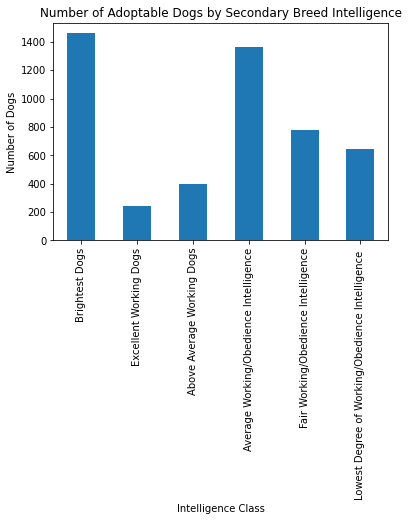

In [24]:
count_by_int_secondary=only_second_breed_df.groupby("secondary_int_class")["secondary_int_class"].count().loc[int_order]
count_by_int_secondary.plot(kind='bar',title="Number of Adoptable Dogs by Secondary Breed Intelligence", ylabel="Number of Dogs", xlabel="Intelligence Class")

I decided to look at the top 10 secondary breed listings to see if labrador retrievers and chihuahuas had the same prevalence that they did for primary breeds. Counter-intuitively, the most common listing for secondary breeds by a substantial margin was "mixed breed". The existence of a secondary breed implies that the dog is mixed breed, and including this information where data about the nature of that second breed muddles the initial Petfinder data. Nevertheless, This data show pit bull terriers being represented more than even labrador retrievers. Also, chihuahuas were listed as the 7th most common secondary breed despite being the 2nd most common primary breed. 

<Axes: title={'center': 'Number of Adoptable Dogs by Secondary Breed (top 10)'}, xlabel='Breed', ylabel='Number of Dogs'>

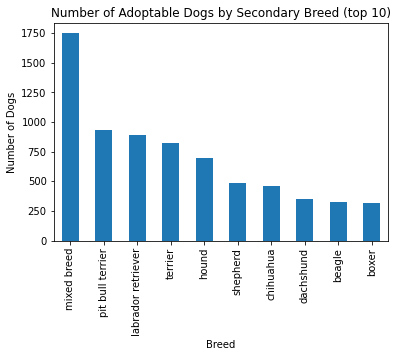

In [25]:
count_by_breed_secondary=only_second_breed_df.groupby("breed_secondary")["breed_secondary"].count().sort_values(ascending=False)
count_by_breed_secondary.head(10).plot(kind='bar',title="Number of Adoptable Dogs by Secondary Breed (top 10)", ylabel="Number of Dogs", xlabel="Breed")

From this data, I have determined that there is no real association between the intelligence of a dog breed based on the study that produced the data that I used and an individual dog's likelihood to be listed for adoption. If anything, the most intelligent classification of dogs was the best represented in both primary and secondary breed. So, my hypothesis was entirely incorrect. However, there were certain breeds that seem to be more likely to be listed for adoption than others. For primary breeds, these were labrador retrievers, chihuahuas, boxers, american staffordshire terriers, and beagles. For secondary breeds, these were "mixed breed", pit bull terriers, labrador retievers, terriers, and hounds. There was no real trend in intelligence classification for these breeds. This project has led me to the realization that intelligence is most likely not one of the determinants for whether or not a dog is more likely to be listed for adoption.